# Credit Scoring PD(probability of default) Model

# Pre-Processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r'credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [7]:
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [8]:
data.drop(columns=data[['ID', 'CustomerID', 'Name', 'TypeofLoan']],axis=1,  inplace=True)

In [9]:
data.drop(columns=['SSN'], axis=1, inplace=True)

In [10]:
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [11]:
data['score']=np.where(data['CreditScore']=='Poor', 1, 0)

In [12]:
data['score'].value_counts()

score
0    62145
1    25350
Name: count, dtype: int64

In [13]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [14]:
for i in data.columns:
    if data[i].dtypes!=object:
        data[i].fillna(value=data[i].mean(), inplace=True)
    else:
        data[i].fillna(value=data[i].mode()[0], inplace=True)

In [15]:
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,4193.181285,3,4,3,4,-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,4193.181285,3,4,3,4,3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,4193.181285,3,4,3,4,5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.000000,9.500000,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.000000,11.500000,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.000000,11.500000,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.000000,11.500000,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


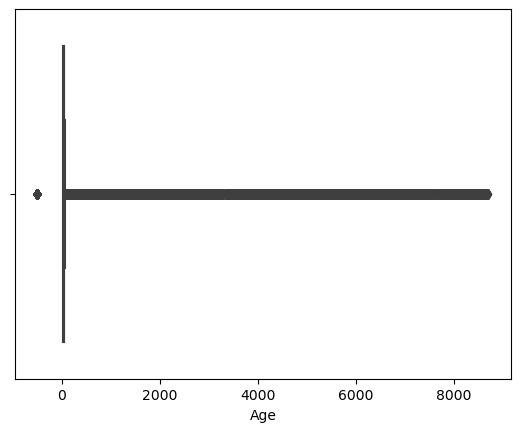

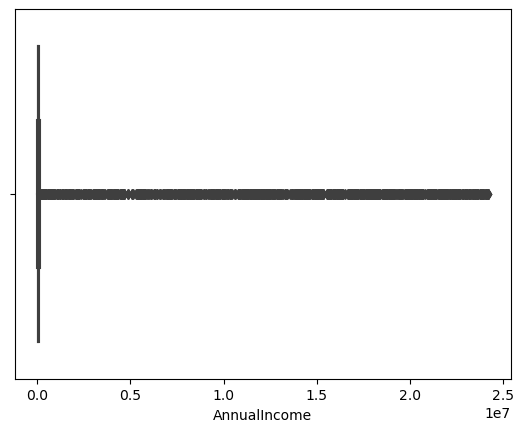

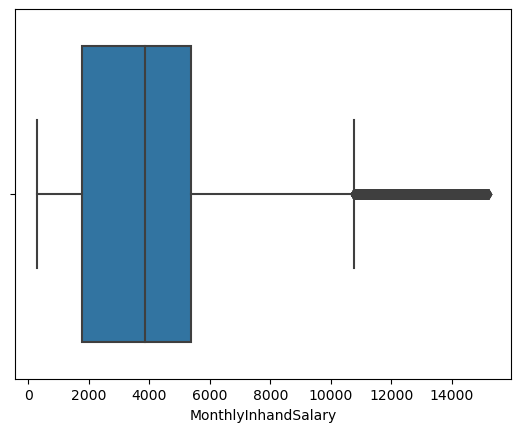

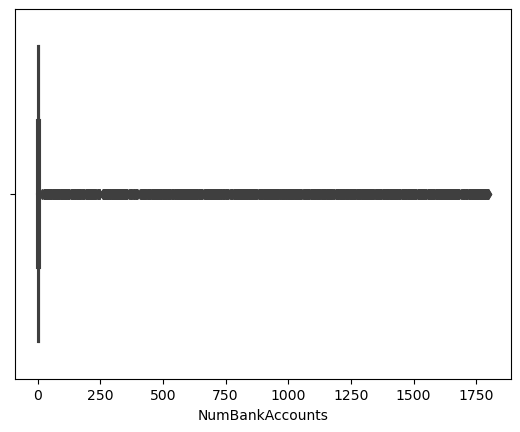

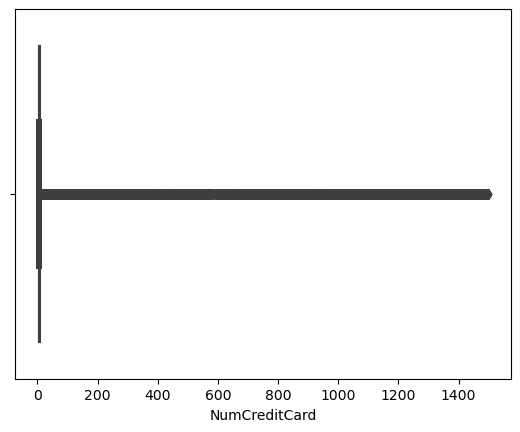

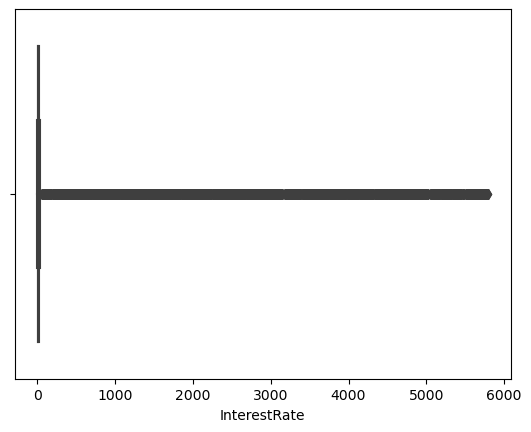

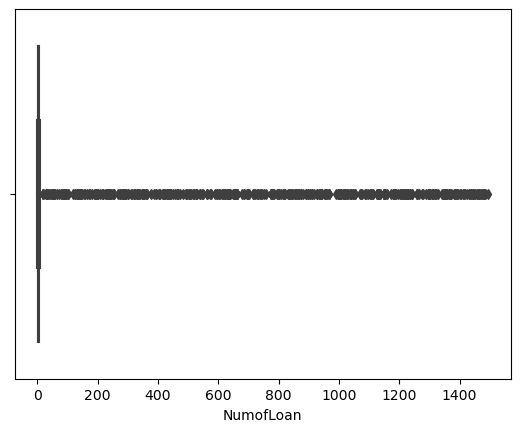

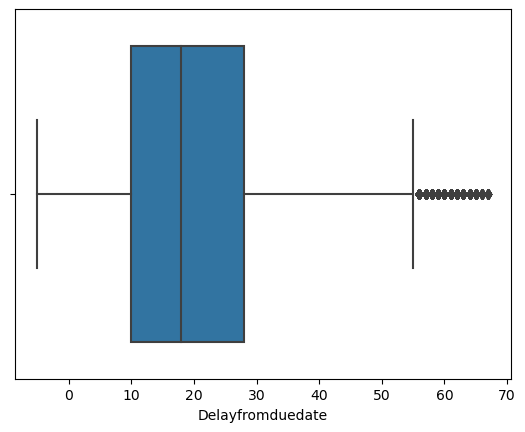

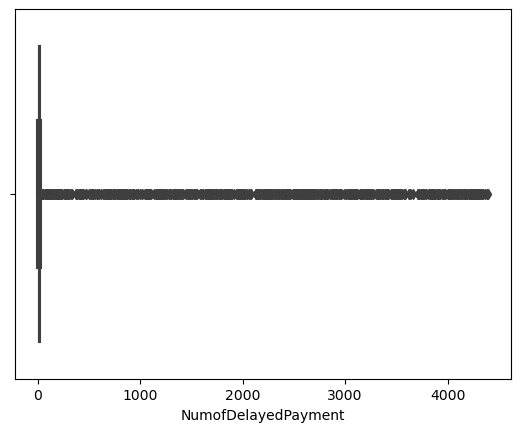

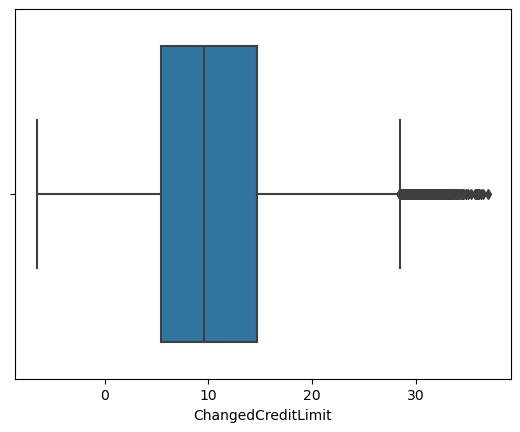

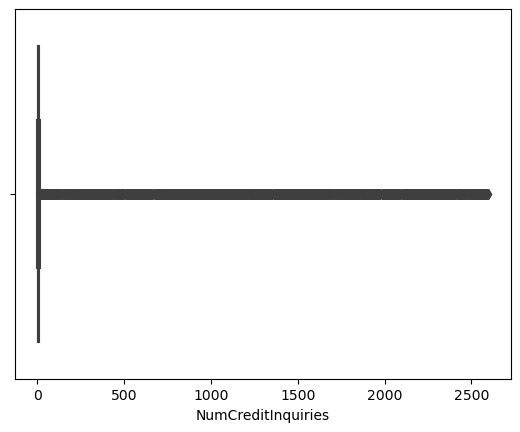

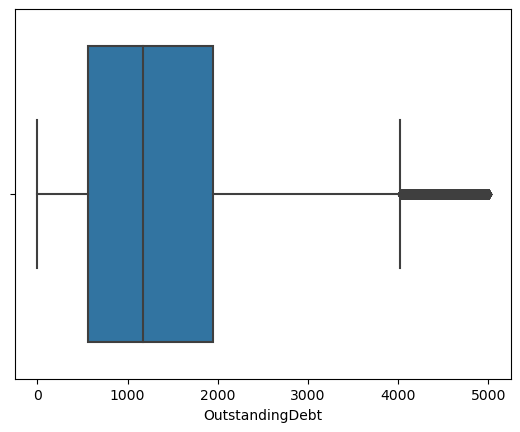

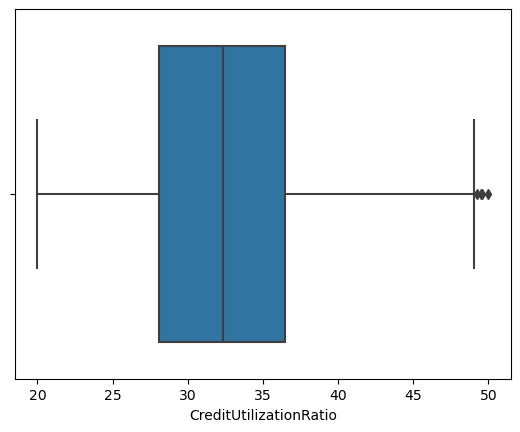

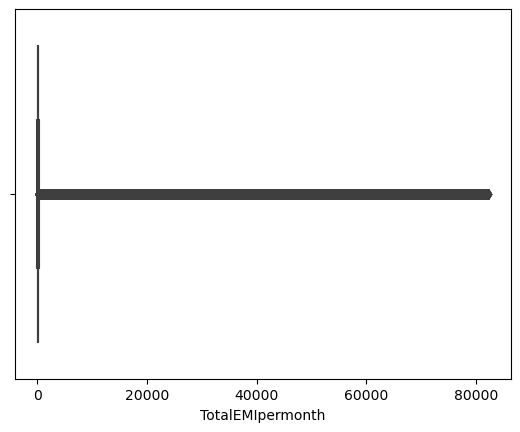

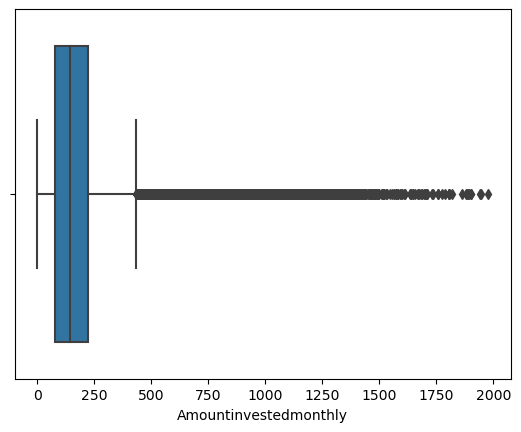

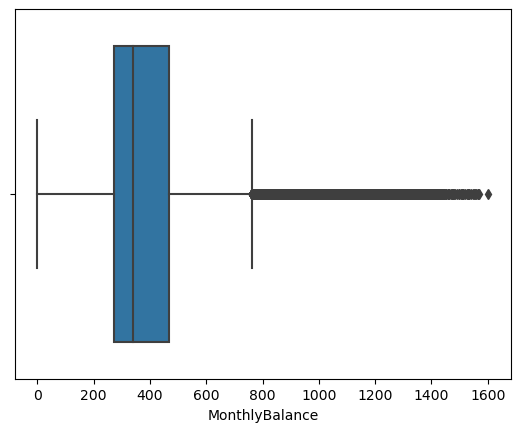

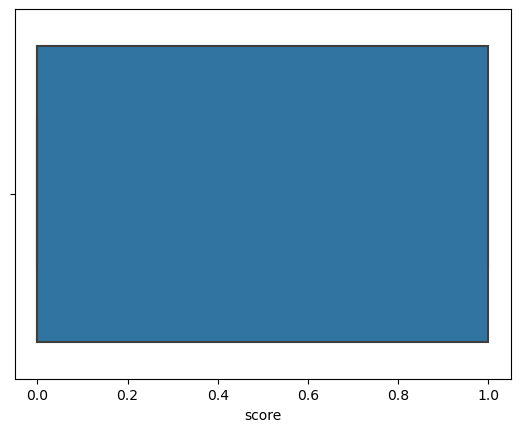

In [16]:
for i in data.columns:
    if data[i].dtypes!=object:
        sns.boxplot(data=data, x=data[i])
        plt.show()

In [17]:
q1=data.quantile(0.25, numeric_only=True)
q3=data.quantile(0.75, numeric_only=True)
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR

In [18]:
upper

Age                           69.000000
AnnualIncome              153064.980000
MonthlyInhandSalary        10751.811042
NumBankAccounts               13.000000
NumCreditCard                 11.500000
InterestRate                  38.000000
NumofLoan                     11.000000
Delayfromduedate              55.000000
NumofDelayedPayment           34.000000
ChangedCreditLimit            28.462500
NumCreditInquiries            18.000000
OutstandingDebt             4022.850000
CreditUtilizationRatio        49.150420
TotalEMIpermonth             357.834336
Amountinvestedmonthly        434.384557
MonthlyBalance               762.777973
score                          2.500000
dtype: float64

In [19]:
lower

Age                          -3.000000
AnnualIncome             -60745.420000
MonthlyInhandSalary       -3583.053958
NumBankAccounts              -3.000000
NumCreditCard                -0.500000
InterestRate                -10.000000
NumofLoan                    -5.000000
Delayfromduedate            -17.000000
NumofDelayedPayment          -6.000000
ChangedCreditLimit           -8.397500
NumCreditInquiries           -6.000000
OutstandingDebt           -1507.470000
CreditUtilizationRatio       15.404249
TotalEMIpermonth           -165.975779
Amountinvestedmonthly      -137.490871
MonthlyBalance              -24.197636
score                        -1.500000
dtype: float64

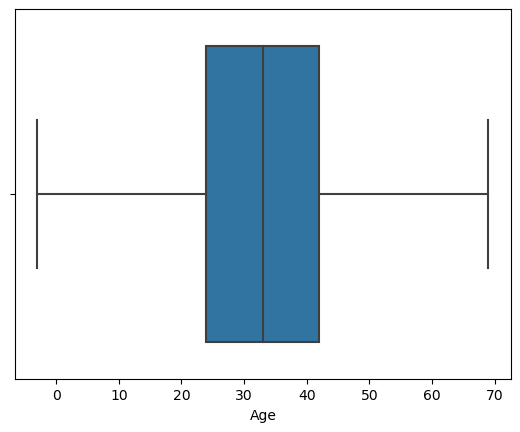

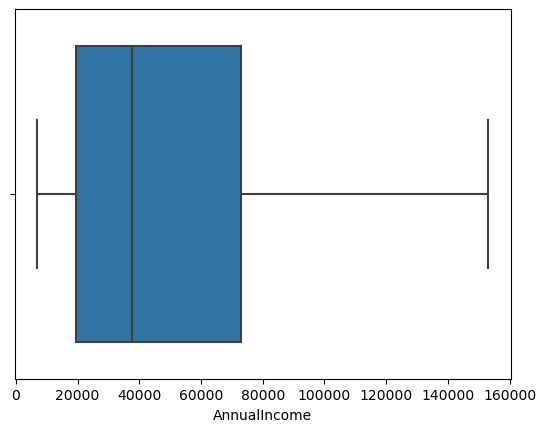

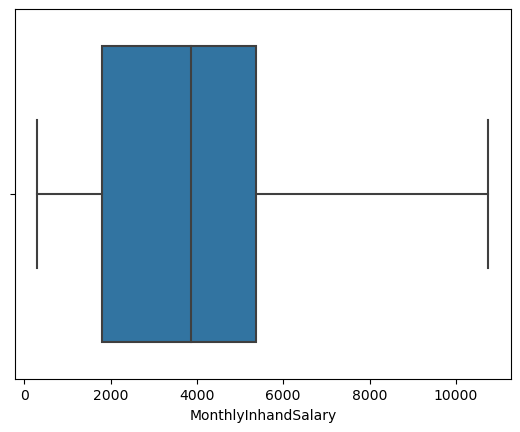

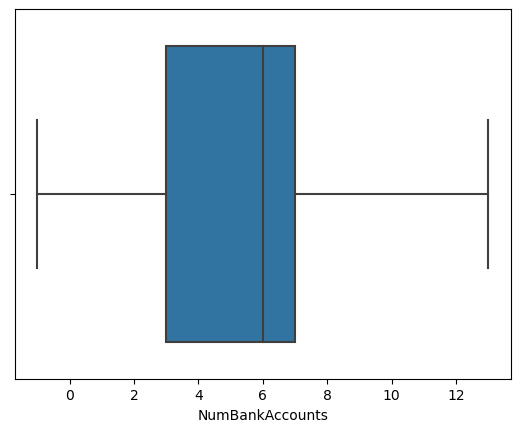

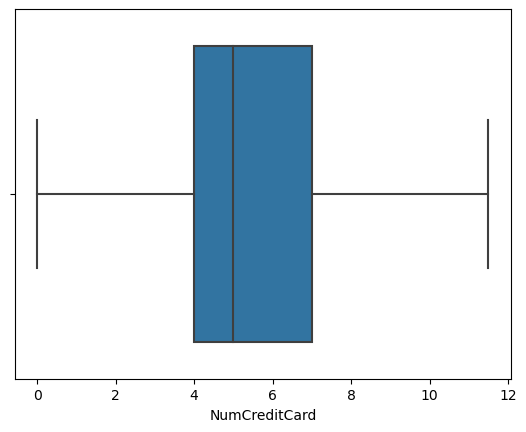

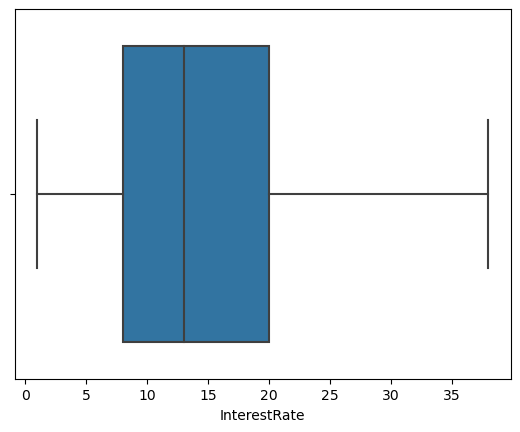

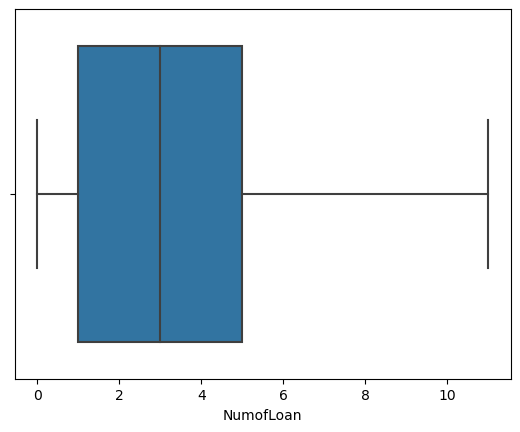

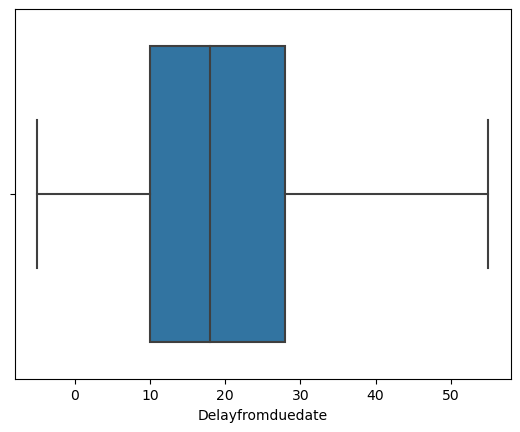

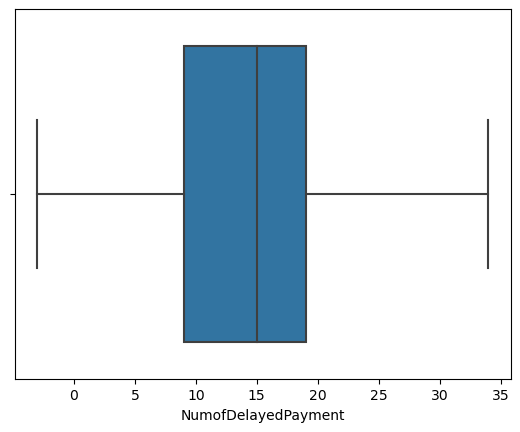

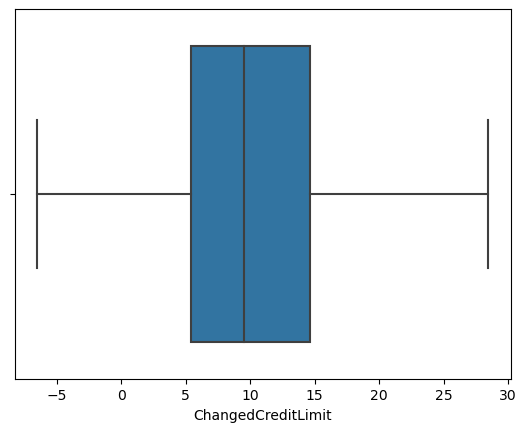

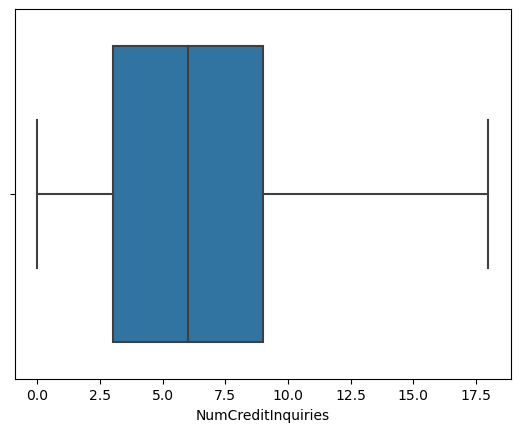

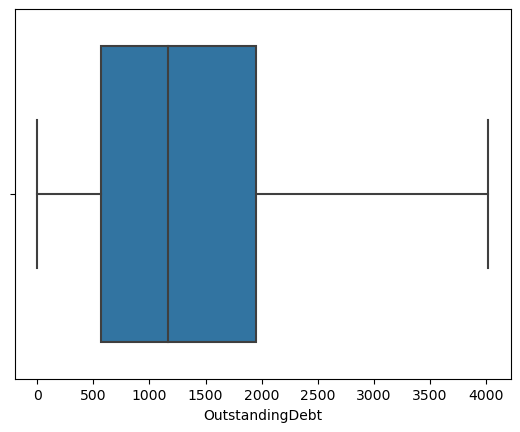

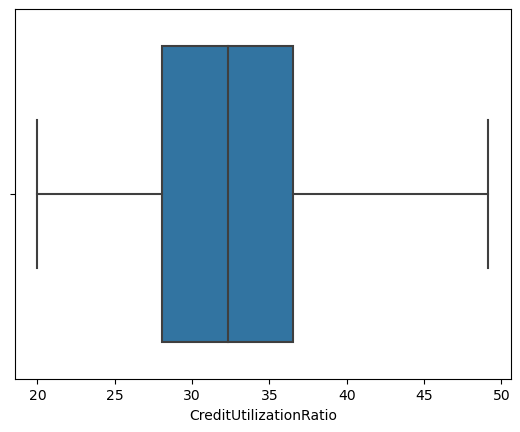

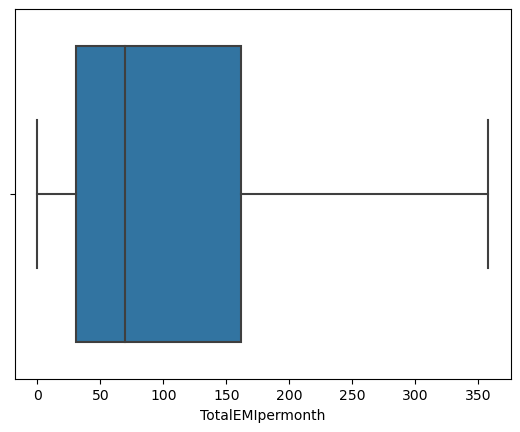

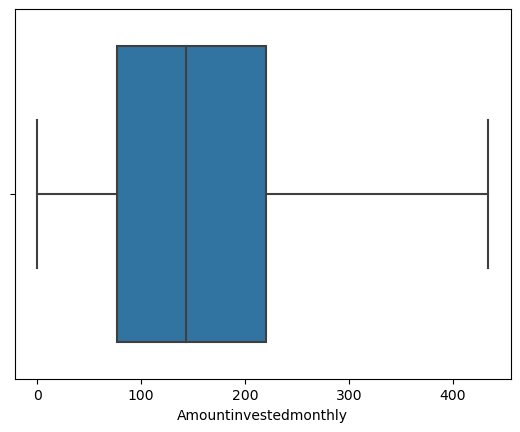

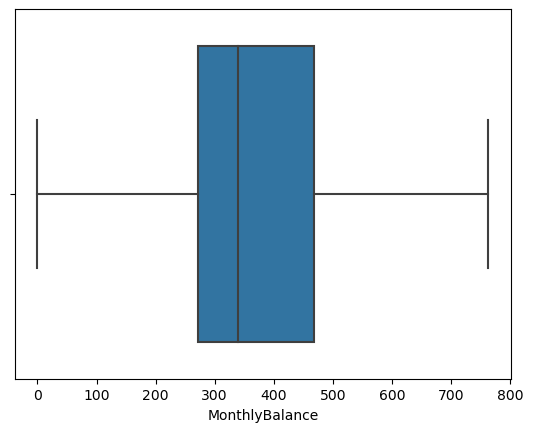

In [20]:
for i in data.columns:
    if (data[i].dtypes!=object) & (i!='score'):
        data[i]=np.where(data[i]>upper[i], upper[i], (np.where(data[i]<lower[i], lower[i], data[i])))
        sns.boxplot(data=data, x=data[i])
        plt.show()

In [21]:
from scipy import stats

for i in data.columns:
    if data[i].dtypes!=object:
        kstest_statistic, kstest_p_value=stats.kstest(data[i], 'norm')
        
        print(f"column: {i}")
        print(f"kstest_statistic: {kstest_statistic}")
        print(f"kstest_pvalue: {kstest_p_value}")
        
        if kstest_p_value>0.05:
            print("data looks normal dist")
        else:
            print("data doesnt look normal dist")

column: Age
kstest_statistic: 0.9904794559689125
kstest_pvalue: 0.0
data doesnt look normal dist
column: AnnualIncome
kstest_statistic: 1.0
kstest_pvalue: 0.0
data doesnt look normal dist
column: MonthlyInhandSalary
kstest_statistic: 1.0
kstest_pvalue: 0.0
data doesnt look normal dist
column: NumBankAccounts
kstest_statistic: 0.889153405396812
kstest_pvalue: 0.0
data doesnt look normal dist
column: NumCreditCard
kstest_statistic: 0.9558429305125329
kstest_pvalue: 0.0
data doesnt look normal dist
column: InterestRate
kstest_statistic: 0.9505969164545867
kstest_pvalue: 0.0
data doesnt look normal dist
column: NumofLoan
kstest_statistic: 0.724195407796949
kstest_pvalue: 0.0
data doesnt look normal dist
column: Delayfromduedate
kstest_statistic: 0.953961834067347
kstest_pvalue: 0.0
data doesnt look normal dist
column: NumofDelayedPayment
kstest_statistic: 0.9414125455365738
kstest_pvalue: 0.0
data doesnt look normal dist
column: ChangedCreditLimit
kstest_statistic: 0.892486002714202
kstest

In [22]:
def target_corr(data, target, threshold=0.3):
    corr_matrix=data.corr(numeric_only=True, method='spearman')
    target_var=corr_matrix[target].abs()>threshold
    target_exp_var=target_var[target_var].index.tolist()
    target_exp_var.remove(target)
    
    result=pd.DataFrame({'variable':target_exp_var,
                         'target_corr':corr_matrix.loc[target_exp_var, target]})
    result.reset_index(inplace=True, drop=True)
    return result


In [23]:
target_corr(data, 'score')

,variable,target_corr
0,NumCreditCard,0.308286
1,InterestRate,0.377536
2,Delayfromduedate,0.352955
3,NumCreditInquiries,0.360878
4,OutstandingDebt,0.415180


In [24]:
def intercorr(data, target, threshold=0.7):
    corr_matrix=data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    target_var=(corr_matrix.abs()>threshold) & (corr_matrix!=1.0)
    independent_var=np.where(target_var)
    correlated_pairs=set()
    for var1, var2 in zip(independent_var[0], independent_var[1]):
        if var1<var2:
            correlated_pairs.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs.add((corr_matrix.index[var2], corr_matrix.columns[var1]))


    result=pd.DataFrame(list(correlated_pairs), columns=['variable1', 'variable2'])
    
    result.reset_index()
    return result

In [25]:
intercorr(data, 'score')

,variable1,variable2
0,AnnualIncome,MonthlyInhandSalary


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data, variables):
    vif_data=data[variables]
    vif_values=[variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result=pd.DataFrame({'vif':vif_values,
                            'feature':variables})
    return vif_result

In [27]:
vif(data, ['NumCreditCard', 'InterestRate', 'Delayfromduedate', 'NumCreditInquiries', 'OutstandingDebt'])

,vif,feature
0,5.553570,NumCreditCard
1,6.401852,InterestRate
2,5.466441,Delayfromduedate
3,4.406847,NumCreditInquiries
4,5.201546,OutstandingDebt


In [28]:
data = data[[ 'InterestRate', 'Delayfromduedate', 'OutstandingDebt','NumCreditInquiries', 'score']]

data

,InterestRate,Delayfromduedate,OutstandingDebt,NumCreditInquiries,score
0,3.0,3.0,809.98,4.0,0
1,3.0,-1.0,809.98,4.0,0
2,3.0,3.0,809.98,4.0,0
3,3.0,5.0,809.98,4.0,0
4,3.0,6.0,809.98,4.0,0
...,...,...,...,...,...
87490,7.0,20.0,502.38,3.0,1
87491,7.0,23.0,502.38,3.0,1
87492,7.0,18.0,502.38,3.0,1
87493,38.0,27.0,502.38,3.0,1


In [29]:
for i in data.columns[:-1]:
    if data[i].dtypes!=object:
        q1=data[i].quantile(0.25)
        q2=data[i].quantile(0.5)
        q3=data[i].quantile(0.75)
        
        ranges=[-np.inf, q1, q2, q3, np.inf]
        data['category_'+i]=pd.cut(data[i], bins=ranges, duplicates='drop')
        
        grouped=data.groupby(['category_'+i, 'score'])['score'].count().unstack().reset_index()
        grouped['positive_prob']=grouped[0]/grouped[0].sum()
        grouped['negative_prob']=grouped[1]/grouped[1].sum()
        
        grouped[i+'_woe']=np.log(grouped['positive_prob']/grouped['negative_prob'])
        
        data=data.merge(grouped[['category_'+i, i+'_woe']], how='left', on='category_'+i)

C:\Users\admin\AppData\Local\Temp\ipykernel_13772\2164311479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_'+i]=pd.cut(data[i], bins=ranges, duplicates='drop')


In [30]:
for i in data.columns:
    if data[i].dtypes==object:
        grouped=data.groupby([i, 'score'])['score'].count().unstack().reset_index()
        grouped['positive_prob']=grouped[0]/grouped[0].sum()
        grouped['negative_prob']=grouped[1]/grouped[1].sum()
        grouped[i+'_woe']=np.log(grouped['positive_prob']/grouped['negative_prob'])
        data=data.merge(grouped[[i, i+'_woe']], how='left', on=i)

In [31]:
data

,InterestRate,Delayfromduedate,OutstandingDebt,NumCreditInquiries,score,category_InterestRate,InterestRate_woe,category_Delayfromduedate,Delayfromduedate_woe,category_OutstandingDebt,OutstandingDebt_woe,category_NumCreditInquiries,NumCreditInquiries_woe
0,3.0,3.0,809.98,4.0,0,"(-inf, 8.0]",0.963156,"(-inf, 10.0]",1.050763,"(566.4, 1166.23]",1.209568,"(3.0, 6.0]",0.558452
1,3.0,-1.0,809.98,4.0,0,"(-inf, 8.0]",0.963156,"(-inf, 10.0]",1.050763,"(566.4, 1166.23]",1.209568,"(3.0, 6.0]",0.558452
2,3.0,3.0,809.98,4.0,0,"(-inf, 8.0]",0.963156,"(-inf, 10.0]",1.050763,"(566.4, 1166.23]",1.209568,"(3.0, 6.0]",0.558452
3,3.0,5.0,809.98,4.0,0,"(-inf, 8.0]",0.963156,"(-inf, 10.0]",1.050763,"(566.4, 1166.23]",1.209568,"(3.0, 6.0]",0.558452
4,3.0,6.0,809.98,4.0,0,"(-inf, 8.0]",0.963156,"(-inf, 10.0]",1.050763,"(566.4, 1166.23]",1.209568,"(3.0, 6.0]",0.558452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,7.0,20.0,502.38,3.0,1,"(-inf, 8.0]",0.963156,"(18.0, 28.0]",-0.100916,"(-inf, 566.4]",1.271917,"(-inf, 3.0]",1.102930
87491,7.0,23.0,502.38,3.0,1,"(-inf, 8.0]",0.963156,"(18.0, 28.0]",-0.100916,"(-inf, 566.4]",1.271917,"(-inf, 3.0]",1.102930
87492,7.0,18.0,502.38,3.0,1,"(-inf, 8.0]",0.963156,"(10.0, 18.0]",0.496847,"(-inf, 566.4]",1.271917,"(-inf, 3.0]",1.102930
87493,38.0,27.0,502.38,3.0,1,"(20.0, inf]",-1.376154,"(18.0, 28.0]",-0.100916,"(-inf, 566.4]",1.271917,"(-inf, 3.0]",1.102930


In [32]:
data.filter(regex='_woe', axis=1).columns

Index(['InterestRate_woe', 'Delayfromduedate_woe', 'OutstandingDebt_woe',
       'NumCreditInquiries_woe'],
      dtype='object')

In [33]:
data1=data[['OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe','Delayfromduedate_woe'
        , 'score']]
data1

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,score
0,1.209568,0.963156,0.558452,1.050763,0
1,1.209568,0.963156,0.558452,1.050763,0
2,1.209568,0.963156,0.558452,1.050763,0
3,1.209568,0.963156,0.558452,1.050763,0
4,1.209568,0.963156,0.558452,1.050763,0
...,...,...,...,...,...
87490,1.271917,0.963156,1.102930,-0.100916,1
87491,1.271917,0.963156,1.102930,-0.100916,1
87492,1.271917,0.963156,1.102930,0.496847,1
87493,1.271917,-1.376154,1.102930,-0.100916,1


In [34]:
output=data1['score']
input=data1[['OutstandingDebt_woe', 'InterestRate_woe','NumCreditInquiries_woe', 'Delayfromduedate_woe',
       ]]


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(input, output, test_size=0.3, random_state=42)

In [48]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [49]:
def evaluate(model, input_test, output_test):
    output_pred=model.predict(input_test)
    output_prob=model.predict_proba(input_test)[:,1]
    roc_prob=roc_auc_score(output_test, output_prob)
    
    gini=(2*roc_prob)-1
    
    confusion_matrix=metrics.confusion_matrix(output_test, output_pred)
    report=classification_report(output_test, output_pred)
    
    print(confusion_matrix)
    print(report)

In [50]:
model=LogisticRegression()
model.fit(input_train, output_train)

LogisticRegression()

In [51]:
evaluate(model, input_test, output_test)

[[15949  2647]
 [ 3207  4446]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     18596
           1       0.63      0.58      0.60      7653

    accuracy                           0.78     26249
   macro avg       0.73      0.72      0.72     26249
weighted avg       0.77      0.78      0.77     26249



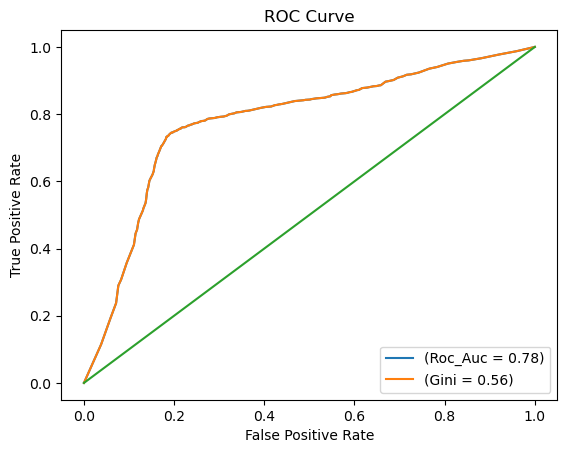

In [52]:
y_prob = model.predict_proba(x_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

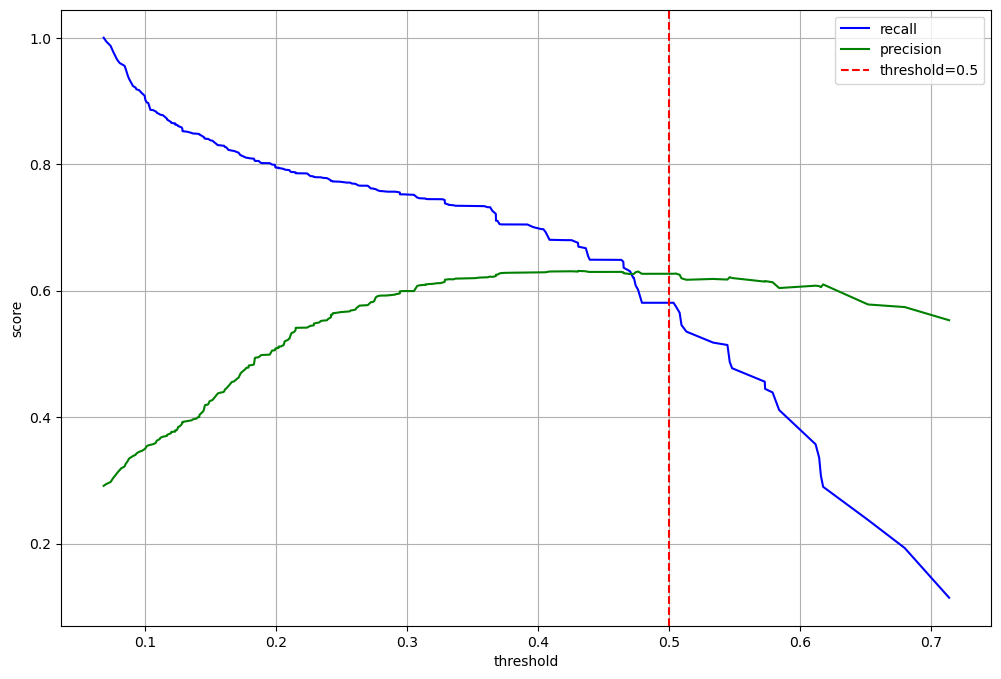

In [53]:
from sklearn.metrics import precision_recall_curve
y_prob=model.predict_proba(x_test)[:,1]
precision, recall, threshold=precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(12, 8))
plt.plot(threshold, recall[:-1], label='recall', color='blue')
plt.plot(threshold, precision[:-1], label='precision', color='green')
plt.xlabel('threshold')
plt.ylabel('score')
plt.axvline(x=0.5, color='red', linestyle='--', label='threshold=0.5')
plt.legend()
plt.grid()
plt.show()

# Univariate analysis of Gini

In [54]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc

variables = []
train_gini_scores = []
test_gini_scores = []

for i in x_train.columns:
    x_train_single_var = x_train[[i]]
    x_test_single_var = x_test[[i]]

    model.fit(x_train_single_var, y_train)
    y_pred_train_single_var = model.predict_proba(x_train_single_var)[:, 1]
    
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = model.predict_proba(x_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)

    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train Gini,Test Gini
0,OutstandingDebt_woe,0.5153,0.5117
1,InterestRate_woe,0.5002,0.5011
2,NumCreditInquiries_woe,0.4459,0.4376
3,Delayfromduedate_woe,0.4229,0.4030


# Secilmish variable-lar ile yeni model

In [56]:
data_final=data1[['OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe', 'Delayfromduedate_woe', 'score']]
data_final

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,score
0,1.2096,0.9632,0.5585,1.0508,0
1,1.2096,0.9632,0.5585,1.0508,0
2,1.2096,0.9632,0.5585,1.0508,0
3,1.2096,0.9632,0.5585,1.0508,0
4,1.2096,0.9632,0.5585,1.0508,0
...,...,...,...,...,...
87490,1.2719,0.9632,1.1029,-0.1009,1
87491,1.2719,0.9632,1.1029,-0.1009,1
87492,1.2719,0.9632,1.1029,0.4968,1
87493,1.2719,-1.3762,1.1029,-0.1009,1


In [57]:
input_final=data_final.drop('score', axis=1)
output_final=data_final['score']

In [58]:
x_train_final, x_test_final, y_train_final, y_test_final=train_test_split(input_final, output_final, test_size=0.2, random_state=42)

In [59]:
model_final=LogisticRegression()
model_final.fit(x_train_final, y_train_final)

LogisticRegression()

In [60]:
accuracy_final=evaluate(model_final, x_train_final, y_train_final)
accuracy_final

[[42777  6937]
 [ 8460 11822]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     49714
           1       0.63      0.58      0.61     20282

    accuracy                           0.78     69996
   macro avg       0.73      0.72      0.73     69996
weighted avg       0.78      0.78      0.78     69996

